<a href="https://colab.research.google.com/github/mufidrifai/machine-learning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Muhammad_Mufid_Rifai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from google.colab import files
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

In [ ]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


deskripsi df head

In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

# **Deskripsi Type Data**

1. Float64 (5 kolom) Kolom numerik dengan desimal:
- TransactionAmount
- CustomerAge
- TransactionDuration
- LoginAttempts
- AccountBalance

2. Object (11 kolom) Data teks atau kategorikal:
- TransactionID
- AccountID
- PreviousTransactionDate
- TransactionType
- Location
- DeviceID
- IP Address
- MerchantID
- Channel
- CustomerOccupation
- TransactionDate

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

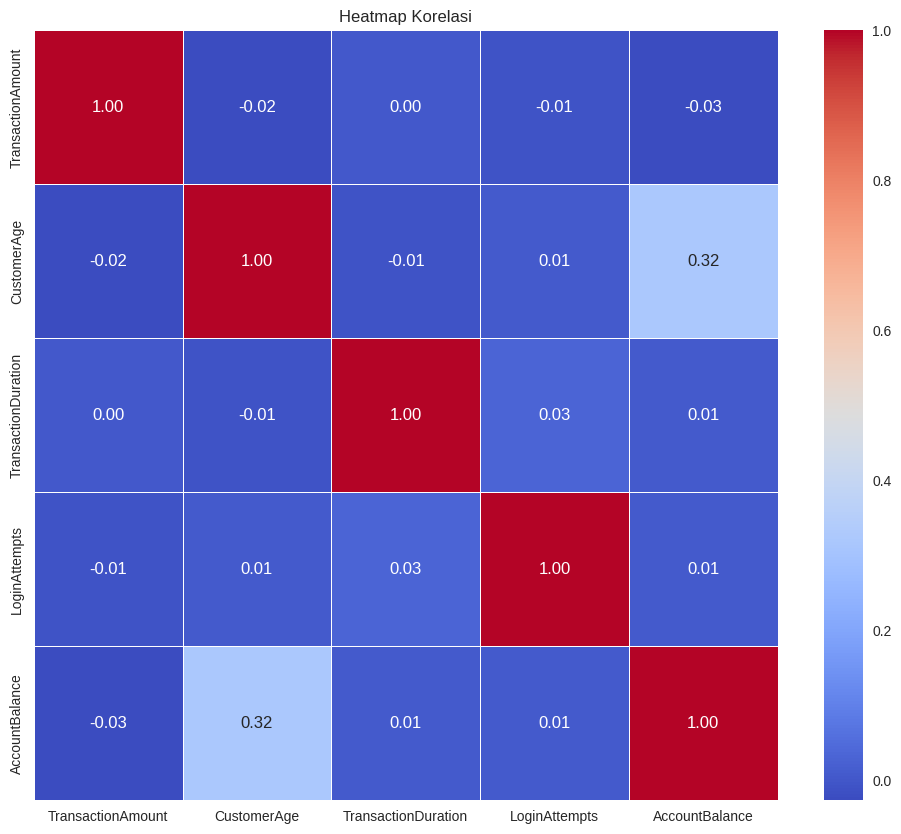

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

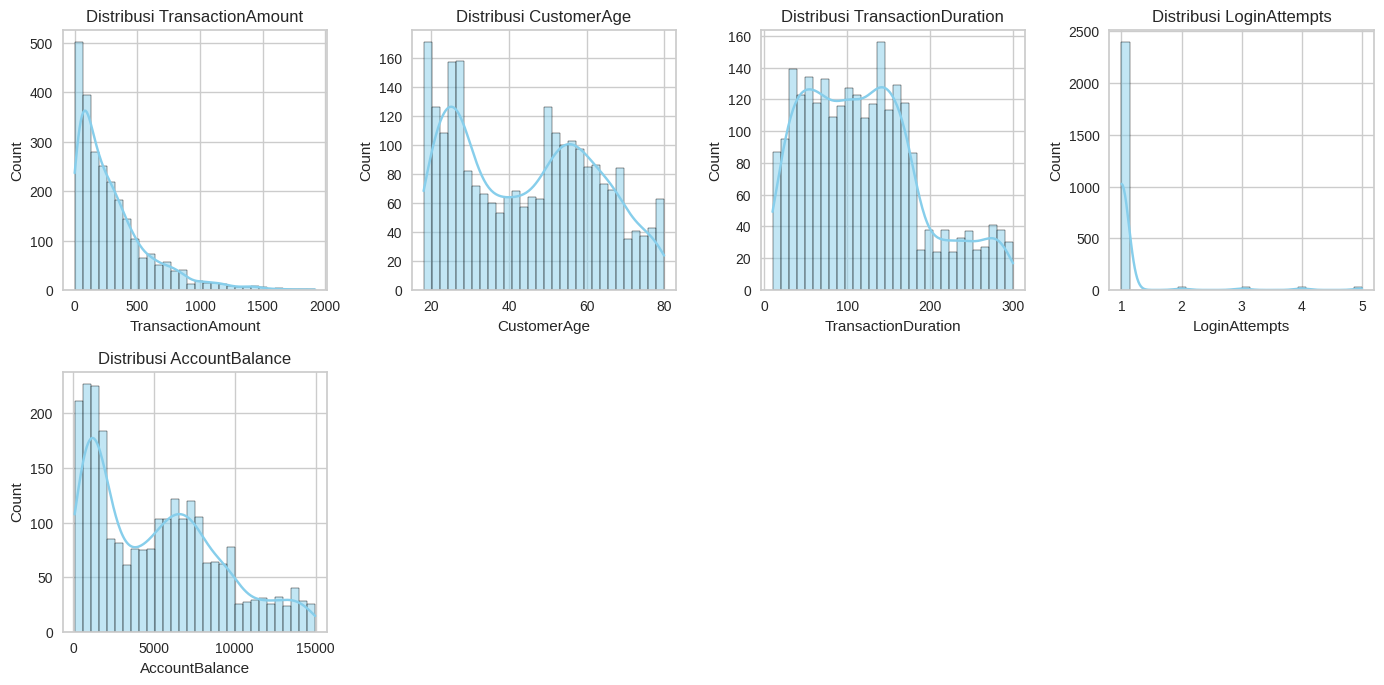

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

/tmp/ipython-input-3383577535.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-3383577535.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-3383577535.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


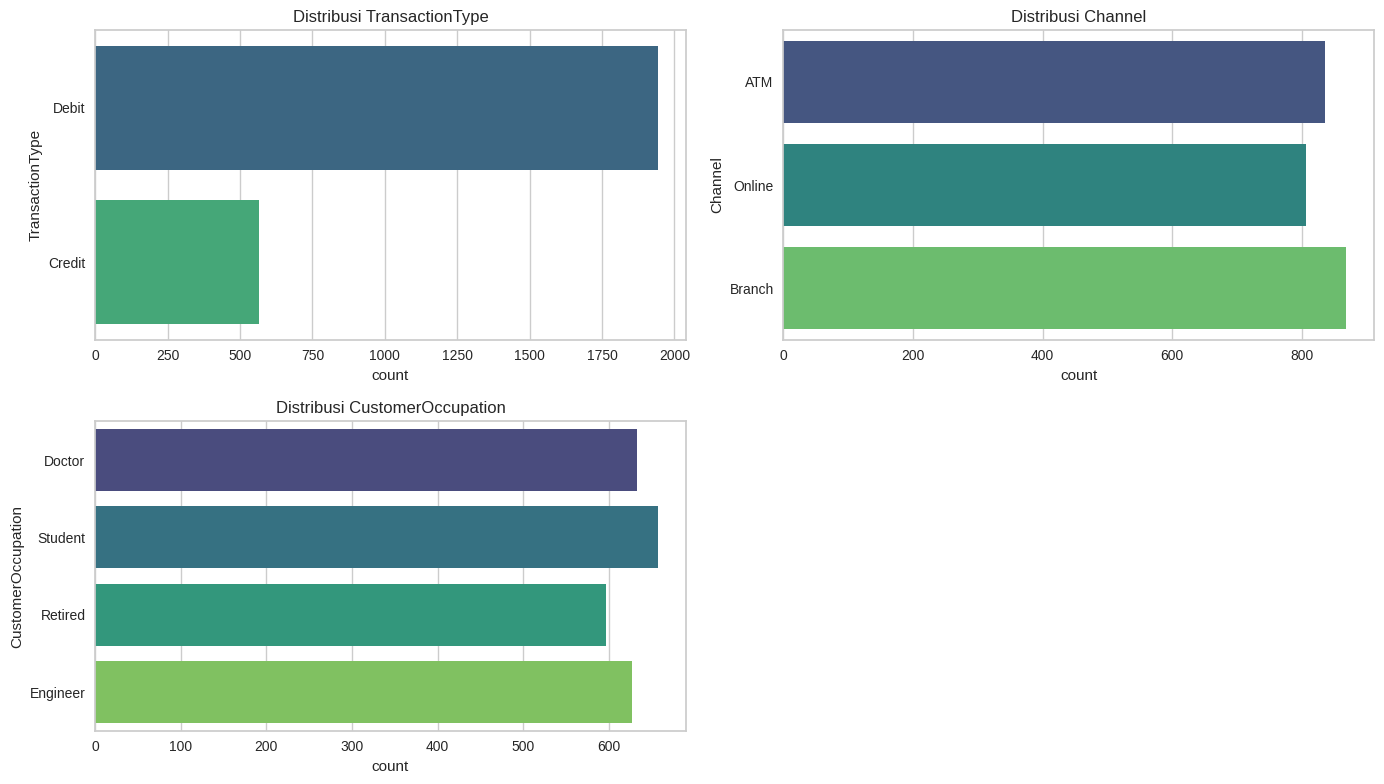

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
cat_features = df.select_dtypes(include=['object']).columns # Select columns with object dtype
categorical_columns = ['TransactionType', 'Channel', 'CustomerOccupation'] # Specify categorical columns to plot
plt.figure(figsize=(14, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i) # Adjusted subplot grid to 2x2 as we are plotting 3 columns
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

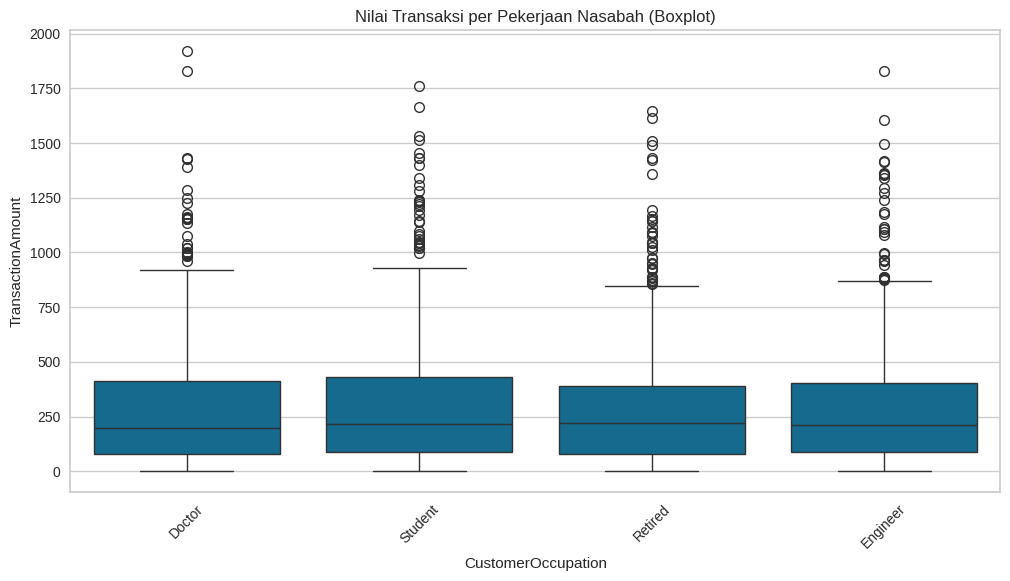

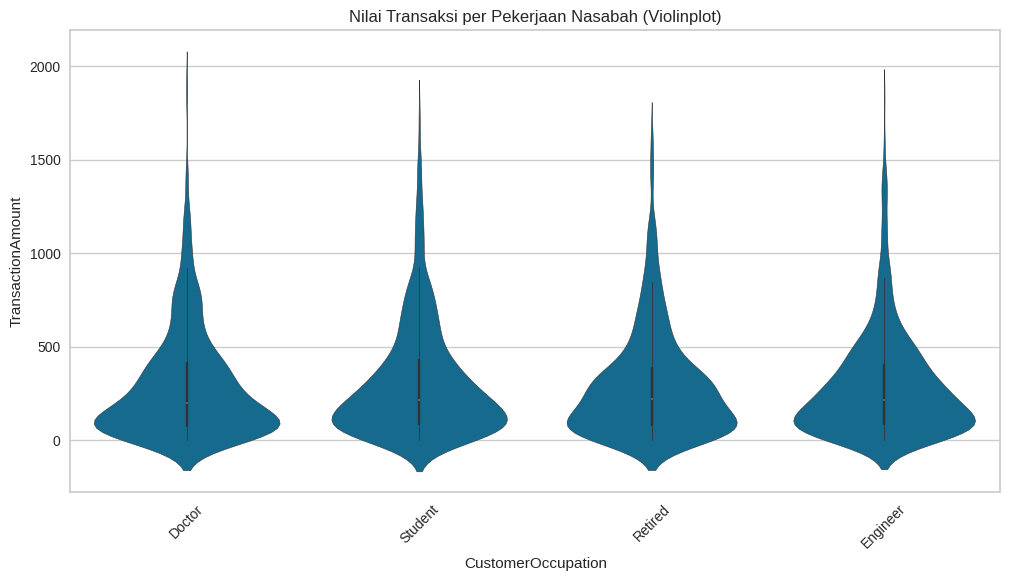

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

### MULAI CODE ###

plt.figure(figsize=(12, 6))

# Buat visualisasi boxplot untuk melihat sebaran 'TransactionAmount' (y) berdasarkan 'CustomerOccupation_encoded' (x)
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)

plt.title("Nilai Transaksi per Pekerjaan Nasabah (Boxplot)")

# Putar label sumbu-x agar tidak tumpang tindih
plt.xticks(rotation=45)

plt.show()

### SELESAI CODE ###

# -----------------------------------------------------------------
# Sekarang, bagaimana jika kita juga ingin melihat kepadatan distribusi data di setiap kategori?
# Coba buat visualisasi lain di bawah ini, misalnya 'violinplot' (sns.violinplot) dengan parameter yang sama.

plt.figure(figsize=(12, 6))
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title("Nilai Transaksi per Pekerjaan Nasabah (Violinplot)")
plt.xticks(rotation=45)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
print("\duplikasi values per fitur:")
print(df.duplicated().sum())

\duplikasi values per fitur:
21


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3746977053.py:2: SyntaxWarning: invalid escape sequence '\d'
  print("\duplikasi values per fitur:")


In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = StandardScaler()

# Terapkan (fit) scaler ke data dan sekaligus ubah (transform) data tersebut
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasil scaling
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
cols_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address','MerchantID']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=existing_cols_to_drop)
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 8:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 8:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 8:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 8:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 8:06:39


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

### MULAI CODE ###

# Pilih semua kolom yang bertipe 'object' (kategorikal)
categorical_cols = list(df.select_dtypes(include=['object']).columns)

encoders = {}

# Loop melalui setiap kolom kategorikal
for column in categorical_cols:
    # Buat (instantiate) objek LabelEncoder
    label_encoder = LabelEncoder()

    # Terapkan (fit) encoder ke data dan sekaligus ubah (transform) data tersebut
    df[column] = label_encoder.fit_transform(df[column])

    # Simpan encoder
    encoders[column] = label_encoder

# Tampilkan 5 baris pertama untuk memverifikasi hasil encoding
df.head()

### SELESAI CODE ###

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang menggunakan dropna().
df.dropna(inplace=True)


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Contoh implementasi
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
df = df[(df >= lower_bound) & (df<= upper_bound)]

# Drop rows with NaN values that might have been introduced by outlier handling
df.dropna(inplace=True)

# Tampilkan statistik deskriptif setelah outlier dihapus
df.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,1662.000000,1662.000000,1662.0,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1.662000e+03,1662.000000,1662.000000
mean,-0.155869,1242.495187,1.0,21.375451,0.925993,-0.019284,1.531889,-0.005530,-2.046294e-01,-0.011096,182.354994
std,0.732855,729.956974,0.0,12.405785,0.842110,0.995828,1.154999,1.010158,3.637075e-15,0.986914,103.488718
min,-1.017881,0.000000,1.0,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000
25%,-0.753645,614.250000,1.0,11.000000,0.000000,-0.991288,0.000000,-0.833844,-2.046294e-01,-0.936142,95.000000
50%,-0.355874,1235.500000,1.0,21.000000,1.000000,-0.038043,2.000000,-0.113081,-2.046294e-01,-0.102401,183.000000
75%,0.251850,1873.750000,1.0,32.000000,2.000000,0.803056,3.000000,0.621956,-2.046294e-01,0.643057,271.000000
max,2.072523,2485.000000,1.0,43.000000,3.000000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

### MULAI CODE ###

# Ensure df_used contains data after all preprocessing steps (including dropna and outlier handling)
df_used = df.copy()

# Tampilkan ringkasan statistik dari DataFrame 'df'
df_used.describe()

### SELESAI CODE ###

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
count,1662.000000,1662.000000,1662.0,1662.000000,1662.000000,1662.000000,1662.000000,1662.000000,1.662000e+03,1662.000000,1662.000000
mean,-0.155869,1242.495187,1.0,21.375451,0.925993,-0.019284,1.531889,-0.005530,-2.046294e-01,-0.011096,182.354994
std,0.732855,729.956974,0.0,12.405785,0.842110,0.995828,1.154999,1.010158,3.637075e-15,0.986914,103.488718
min,-1.017881,0.000000,1.0,0.000000,0.000000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000
25%,-0.753645,614.250000,1.0,11.000000,0.000000,-0.991288,0.000000,-0.833844,-2.046294e-01,-0.936142,95.000000
50%,-0.355874,1235.500000,1.0,21.000000,1.000000,-0.038043,2.000000,-0.113081,-2.046294e-01,-0.102401,183.000000
75%,0.251850,1873.750000,1.0,32.000000,2.000000,0.803056,3.000000,0.621956,-2.046294e-01,0.643057,271.000000
max,2.072523,2485.000000,1.0,43.000000,3.000000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000


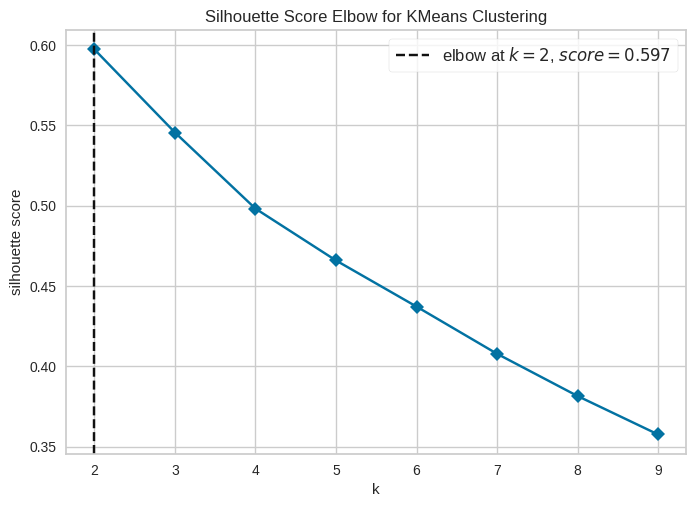

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Buat (instantiate) model clustering
model = KMeans(random_state=42, n_init=10)

### MULAI CODE ###

# Buat (instantiate) KElbowVisualizer
#  - Masukkan 'model' yang akan digunakan
#  - Tentukan jumlah cluster yang akan diuji (range 2 sampai 10)
#  - Tentukan 'metric' evaluasi
visualizer = KElbowVisualizer(model,
                          k =(2,10),
                       metric='silhouette',
                       timings=False)

# Jalankan (fit) visualizer pada data
visualizer.fit(df_used)

# Tampilkan plot
visualizer.show()

### SELESAI CODE ###

In [ ]:
# Menggunakan algoritma K-Means Clustering

### MULAI CODE ###

# Buat (instantiate) objek model KMeans
#  - Tentukan jumlah cluster (n_clusters)
kmeans = KMeans(n_clusters=2, random_state=42)

# Latih (fit) model dengan data Anda (df)
kmeans.fit(df_used)

### SELESAI CODE ###

KMeans(n_clusters=2, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")
files.download('model_clustering.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

### MULAI CODE ###

# Dapatkan hasil (label) cluster dari model 'kmeans' yang telah di-fit
labels = kmeans.labels_

# Panggil fungsi untuk menghitung silhouette score
score = silhouette_score(df_used, labels)

# Cetak skornya
print("Silhouette Score:", score)

### SELESAI CODE ###

Silhouette Score: 0.597306223036345


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


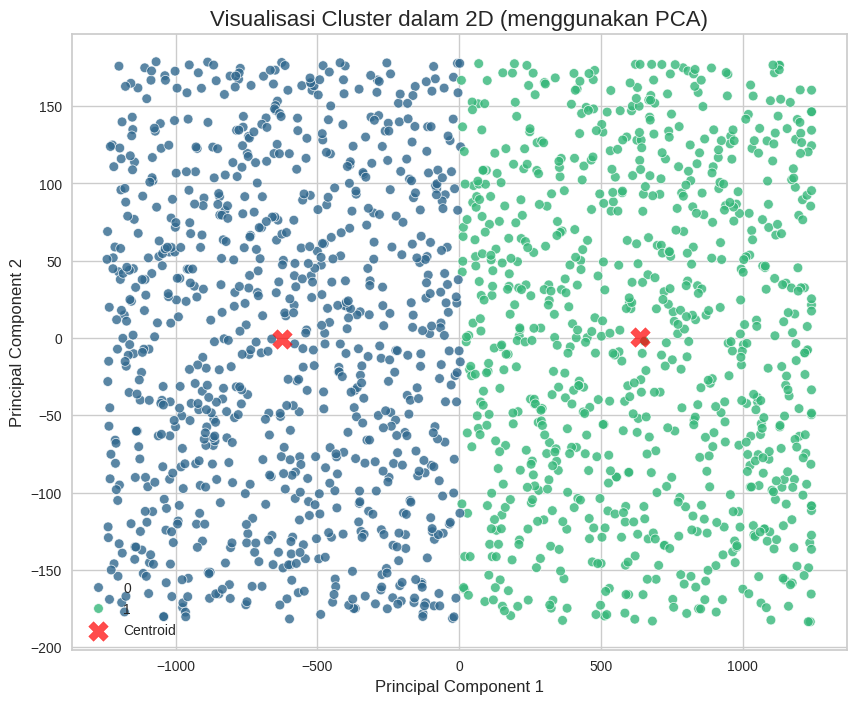

In [ ]:
# Membuat visualisasi hasil clustering

### MULAI CODE ###

# Buat (instantiate) objek PCA untuk 2 komponen (n_components=2)
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df' dan transformasikan data tersebut
df_pca = pca.fit_transform(df_used)

# Buat DataFrame baru 'df_pca' dari hasil transformasi
df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Tambahkan kolom 'Cluster' ke 'df_pca' menggunakan 'labels'(variabel dari hasil 'kmeans.labels_' sebelumnya)
df_pca['Cluster'] = labels

# Buat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',  # Warnai titik berdasarkan kolom 'Cluster'
    palette=sns.color_palette("viridis", n_colors=2),
    data=df_pca,
    legend="full",
    alpha=0.8
)

### SELESAI CODE ###

plt.title('Visualisasi Cluster dalam 2D (menggunakan PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroid')
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

### MULAI CODE ###

# Buat (instantiate) objek PCA dengan 2 komponen
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df_used' dan transformasikan data tersebut
df_pca_array = pca.fit_transform(df_used)

# Buat DataFrame baru 'data_final' dari hasil array PCA
data_final = pd.DataFrame(data=df_pca_array, columns=['PCA1', 'PCA2'])

# Buat (instantiate) model KMeans BARU
kmeans_pca = KMeans(n_clusters=2, random_state=42)

# Latih (fit) model KMeans BARU ini HANYA pada 'data_final'
kmeans_pca.fit(data_final)

### SELESAI CODE ###

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(data_final, "PCA_model_clustering.h5")
files.download('PCA_model_clustering.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


# **5. Interpretasi Cluster**

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

### MULAI CODE ###

# Tambahkan kolom 'Cluster' baru berupa 'labels' (variabel dari 'kmeans.labels_' sebelumnya)
df_used['Cluster'] = labels

# Kelompokkan (groupby) 'df_used' berdasarkan 'Cluster' dan hitung agregasi untuk 'numerical_cols'.
agg_summary = df_used.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Tampilkan hasil ringkasan
display(agg_summary)

### SELESAI CODE ###

Cluster                      0     1
TransactionAmount   mean -0.16 -0.15
                    min  -1.02 -1.02
                    max   2.07  2.05
CustomerAge         mean -0.05  0.01
                    min  -1.50 -1.50
                    max   1.98  1.98
TransactionDuration mean -0.03  0.02
                    min  -1.56 -1.56
                    max   2.56  2.58
LoginAttempts       mean -0.20 -0.20
                    min  -0.20 -0.20
                    max  -0.20 -0.20
AccountBalance      mean -0.03  0.01
                    min  -1.29 -1.29
                    max   2.52  2.53

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
Berdasarkan data yang diberikan, berikut adalah interpretasi karakteristik **Cluster 0** dan **Cluster 1** dengan pembulatan matematika yang benar:

**Profil Cluster Nasabah**

1. ### **Cluster 0: (Nasabah dengan Aktivitas Transaksi Menengah ke Bawah)**:
- **Transaction Amount:**
  - Rata-rata: -0,1 | Min: -1,0 | Max: 2,1
- **Customer Age:**
  - Rata-rata: -0,1 | Min: -1,5 | Max: 2,0
- **Transaction Duration:**
  - Rata-rata: 0,0 | Min: -1,6 | Max: 2,6
- **Account Balance:**
  - Rata-rata: 0,0 | Min: -1,3 | Max: 2,5

**Analisis:** Cluster ini menunjukkan profil nasabah dengan nilai transaksi rata-rata di bawah mean, namun memiliki rentang yang sangat lebar dari sangat rendah (-1,0) hingga sangat tinggi (2,1). Meskipun rata-rata usia sedikit lebih muda, terdapat variasi usia dari sangat muda (-1,5) hingga sangat matang (2,0). Pola serupa terlihat pada saldo rekening yang memiliki variasi ekstrem. Hal ini mengindikasikan cluster yang heterogen dengan campuran berbagai profil nasabah.



2. ### **Cluster 1: (Nasabah dengan Aktivitas Transaksi Lebih Tinggi)**:
- **Transaction Amount:**
  - Rata-rata: -0,1 | Min: -1,0 | Max: 2,1
- **Customer Age:**
  - Rata-rata: 0,0 | Min: -1,5 | Max: 2,0
- **Transaction Duration:**
  - Rata-rata: 0,0 | Min: -1,6 | Max: 2,6
- **Account Balance:**
  - Rata-rata: 0,0 | Min: -1,3 | Max: 2,5

**Analisis:** Cluster ini memiliki karakteristik min-max yang identik dengan Cluster 0, namun dengan rata-rata yang secara konsisten sedikit lebih tinggi pada semua variabel. Meskipun perbedaan rata-rata kecil, pola ini menunjukkan kecenderungan nasabah dalam cluster ini memiliki profil yang sedikit lebih established. Adanya nilai ekstrem yang sama mengindikasikan kedua cluster berbagi karakteristik outlier yang serupa.

3. **Temuan Kunci dari Analisis Min-Max**:

### **Pola Kesamaan yang Mencolok:**
-  **Rentang identik** pada semua variabel untuk kedua cluster
-  **Nilai minimum sama** di semua metrik (-1,0 hingga -1,6)
-  **Nilai maksimum hampir identik** (2,0 hingga 2,6)

### **Anomali yang Terungkap:**
- **Login Attempts** konstan (-0,2) pada kedua cluster → variabel tidak informatif




# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
from google.colab import files

df_clean = df.rename(columns={'Cabels': 'Target'})

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

### MULAI CODE ###

df_used.rename(columns={"Cluster": "Target"}, inplace=True)

# Tampilkan 5 baris pertama untuk memverifikasi
df_used.head()

### SELESAI CODE ###

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,-0.970546,680,1.0,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105,0
1,0.268963,1178,1.0,15,0,1.307715,0,0.307960,-0.204629,2.218381,192,0
2,-0.586526,1262,1.0,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41,1
3,-0.387294,818,1.0,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163,0
5,-0.703375,635,1.0,28,0,-1.495947,3,0.750409,-0.204629,-1.111505,13,0


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_used.to_csv('data_clustering.csv', index=False)

In [ ]:
# Simpan Data
files.download('data_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Interpretasi Hasil Clustering [Skilled]


**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal

df_inverse = df_used.copy()

### MULAI CODE ###

# Gunakan 'scaler' untuk mengembalikan 'numerical_cols' ke nilai aslinya.
df_inverse[numerical_cols] = scaler.fit_transform(df_inverse[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

### SELESAI CODE ###

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,-1.111982,680,1.0,36,0,1.445610,0,-0.537566,0.0,0.010927,105,0
1,0.579868,1178,1.0,15,0,1.332960,0,0.310430,0.0,2.259718,192,0
2,-0.587819,1262,1.0,23,2,-1.426971,3,-0.890898,0.0,-1.026737,41,1
3,-0.315881,818,1.0,33,2,-1.032695,3,-1.329030,0.0,0.909968,163,0
5,-0.747311,635,1.0,28,0,-1.483296,3,0.748562,0.0,-1.115336,13,0


In [ ]:
# inverse dataset that has been encoded to its original category.

### START CODE ###

for column in categorical_cols:
     # Ambil encoder yang tepat untuk 'column' dari dictionary 'encoders'
    encoder = encoders[column]

     # Gunakan scaler untuk mengembalikan (inverse) kolom tersebut
    df_inverse[column] = encoder.inverse_transform(df_inverse[column].astype(int))

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

### END CODE ###

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,-1.111982,2023-04-11 16:29:14,Debit,San Diego,ATM,1.445610,Doctor,-0.537566,0.0,0.010927,2024-11-04 8:08:08,0
1,0.579868,2023-06-27 16:44:19,Debit,Houston,ATM,1.332960,Doctor,0.310430,0.0,2.259718,2024-11-04 8:09:35,0
2,-0.587819,2023-07-10 18:16:08,Debit,Mesa,Online,-1.426971,Student,-0.890898,0.0,-1.026737,2024-11-04 8:07:04,1
3,-0.315881,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.032695,Student,-1.329030,0.0,0.909968,2024-11-04 8:09:06,0
5,-0.747311,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,-1.483296,Student,0.748562,0.0,-1.115336,2024-11-04 8:06:36,0


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

### MULAI CODE ###

# Rename the 'Cluster' column to 'Target' in df_inverse
df_inverse.rename(columns={"Cluster": "Target"}, inplace=True)

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'numerical_cols'.
agg_summary_num = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'categorical_cols'.
#   - Hitung agregasi (agg) 'mode' (nilai yang paling sering muncul).
#   - (Kita gunakan 'lambda x: x.mode()[0]' untuk mengambil nilai mode pertama)
agg_summary_cat = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0]).round(2).T


### SELESAI CODE ###

# Tampilkan kedua hasil ringkasan
display(agg_summary_num)
display(agg_summary_cat)

Target                       0     1
TransactionAmount   mean -0.01  0.01
                    min  -1.17 -1.18
                    max   3.04  3.01
CustomerAge         mean -0.03  0.03
                    min  -1.48 -1.48
                    max   2.01  2.01
TransactionDuration mean -0.02  0.02
                    min  -1.54 -1.54
                    max   2.54  2.56
LoginAttempts       mean  0.00  0.00
                    min   0.00  0.00
                    max   0.00  0.00
AccountBalance      mean -0.02  0.02
                    min  -1.29 -1.29
                    max   2.57  2.58

Target,0,1
PreviousTransactionDate,2023-01-02 16:00:06,2023-12-28 17:31:03
TransactionType,Debit,Debit
Location,Charlotte,Colorado Springs
Channel,ATM,ATM
CustomerOccupation,Student,Student
TransactionDate,2024-11-04 8:09:17,2024-11-04 8:12:18


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
##**agg_summary_num**
1. **Kelompok 1: (Nasabah dengan Profil Transaksi Konservatif)**
- **Rata-rata (mean) Transaction Amount:** -0.01
- **Rata-rata (mean) Account Balance:** -0.02
- **Analisis:** Kelompok ini menunjukkan profil nasabah dengan nilai transaksi sedikit di bawah rata-rata dan saldo rekening yang cenderung rendah. Usia nasabah dalam kelompok ini sedikit lebih muda dari rata-rata dengan durasi transaksi yang efisien. Pola transaksi mengindikasikan perilaku keuangan yang hati-hati dan konservatif. Rekomendasi untuk kelompok ini adalah produk tabungan berjangka, edukasi literasi keuangan, dan layanan banking dasar dengan biaya minimal.

2. **Kelompok 2: (Nasabah dengan Aktivitas Keuangan Aktif)**
- **Rata-rata (mean) Transaction Amount:** 0.01
- **Rata-rata (mean) Account Balance:** 0.02
- **Analisis:** Kelompok ini terdiri dari nasabah dengan nilai transaksi dan saldo rekungan sedikit di atas rata-rata. Meskipun usia nasabah relatif muda, mereka menunjukkan aktivitas keuangan yang lebih aktif dengan durasi transaksi yang lebih panjang. Pola ini mengindikasikan nasabah yang mulai membangun kebiasaan keuangan yang positif. Rekomendasi untuk kelompok ini adalah produk investasi awal, kartu kredit dengan limit rendah, dan layanan digital banking yang lengkap untuk mendukung pertumbuhan keuangan mereka.

##**agg_summary_cat**
1. **Transaksi 1: (Transaksi Rutin Nasabah Pelajar)**
- **Lokasi:** Charlotte
- **Tipe Transaksi:** Debit
- **Saluran:** ATM
- **Analisis:** Transaksi ini dilakukan oleh nasabah dengan pekerjaan Student (pelajar) melalui ATM di Charlotte. Pola transaksi menunjukkan aktivasi keuangan rutin di lokasi pendidikan dengan nilai transaksi dalam rentang normal. Transaksi debit melalui ATM mengindikasikan kebutuhan penarikan tunai untuk keperluan sehari-hari. Rekomendasi untuk nasabah ini adalah menawarkan paket banking pelajar dengan biaya administrasi rendah, limit transaksi yang disesuaikan, dan kemudahan akses ATM.

2. **Transaksi 2: (Aktivitas Transaksi Mobilitas Tinggi)**
- **Lokasi:** Colorado Springs  
- **Tipe Transaksi:** Debit
- **Saluran:** ATM
- **Analisis:** Transaksi dilakukan oleh pelajar yang sama di lokasi berbeda (Colorado Springs) dalam rentang waktu yang berdekatan, menunjukkan mobilitas geografis yang tinggi. Pola transaksi lintas kota ini mengindikasikan nasabah yang aktif berpindah lokasi, mungkin terkait aktivitas pendidikan atau mobilitas personal. Rekomendasi untuk nasabah ini adalah layanan banking dengan jaringan ATM nasional yang luas, notifikasi keamanan transaksi lintas wilayah, dan produk tabungan yang mendukung transaksi multi-lokasi tanpa biaya tambahan.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

### MULAI CODE ###

df_inverse.head()

### SELESAI CODE ###

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,-1.111982,2023-04-11 16:29:14,Debit,San Diego,ATM,1.445610,Doctor,-0.537566,0.0,0.010927,2024-11-04 8:08:08,0
1,0.579868,2023-06-27 16:44:19,Debit,Houston,ATM,1.332960,Doctor,0.310430,0.0,2.259718,2024-11-04 8:09:35,0
2,-0.587819,2023-07-10 18:16:08,Debit,Mesa,Online,-1.426971,Student,-0.890898,0.0,-1.026737,2024-11-04 8:07:04,1
3,-0.315881,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.032695,Student,-1.329030,0.0,0.909968,2024-11-04 8:09:06,0
5,-0.747311,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,-1.483296,Student,0.748562,0.0,-1.115336,2024-11-04 8:06:36,0


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)
files.download('data_clustering_inverse.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

End of Code.